In [1]:
## 二、数据加载与预处理
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体，确保图表中文正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取原始数据
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\hotel_bookings.csv')
df.head()  # 查看数据结构

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


> **数据初览**：  
> 原始数据包含32个字段，核心字段包括：  
> - 酒店类型（`hotel`）：区分城市酒店（City Hotel）和假日酒店（Resort Hotel）  
> - 时间信息（`arrival_date_month`、`reservation_status_date`等）：用于时间维度分析  
> - 预订特征（`lead_time`、`is_canceled`、`stays_in_week_nights`等）：反映用户行为  
> - 价格信息（`adr`）：每日平均房价，用于经济效益分析 

In [3]:
# 数据基本信息查看
print(f"数据形状：{df.shape}")  # 原始数据规模
df.describe()  # 数值型字段统计描述

数据形状：(119390, 32)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.info()  # 字段类型及缺失值情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> **数据概况**：  
> - 原始数据共119390条记录，经清洗后保留114565条有效数据  
> - 数值型字段中，`lead_time`（提前预订时长）均值104天，`adr`（每日房价）均值101.83  
> - 存在缺失值的字段：`country`（488条）、`agent`（16340条）、`children`（4条）、`company`（112593条）  

In [5]:
# 处理缺失值

# 用众数填充 country 列的缺失值
country_mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(country_mode)

# 对于 agent ,children列，用 0 填充缺失值
df.fillna({'children': 0, 'agent': 0}, inplace=True)

# 对于 company 列，由于缺失值较多，直接删除该列
df.drop('company', axis=1, inplace=True)

# 检测并处理异常值（以 adr 列为例，使用 IQR 方法）
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]

# 数据类型转换
# 将 arrival_date_year、arrival_date_week_number、arrival_date_day_of_month 转换为字符串类型，方便后续日期处理
df['arrival_date_year'] = df['arrival_date_year'].astype(str)
df['arrival_date_week_number'] = df['arrival_date_week_number'].astype(str)
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(str)

# 将 reservation_status_date 转换为日期类型
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# 文本数据标准化（以 hotel 列为例，转换为大写）
df['hotel'] = df['hotel'].str.upper()

# 将处理后的数据保存为新的 CSV 文件
cleaned_csv_path = r'C:\Users\Lenovo\Desktop\hotel_bookings_cleaned.csv'
df.to_csv(cleaned_csv_path)

> **清洗说明**：  
> 1. 缺失值处理遵循"业务合理性"原则：country用众数填充（保证分类变量完整性），children和agent用 0 填充（符合实际场景），冗余字段company直接删除，确保数据补充符合实际场景  
> 2. 异常值处理后，`adr`字段范围更合理，避免极端值影响价格分析  
> 3. 日期类型转换为后续时间序列分析奠定基础  

酒店类型预订量分布：
hotel
CITY HOTEL      78040
RESORT HOTEL    37557
Name: count, dtype: int64


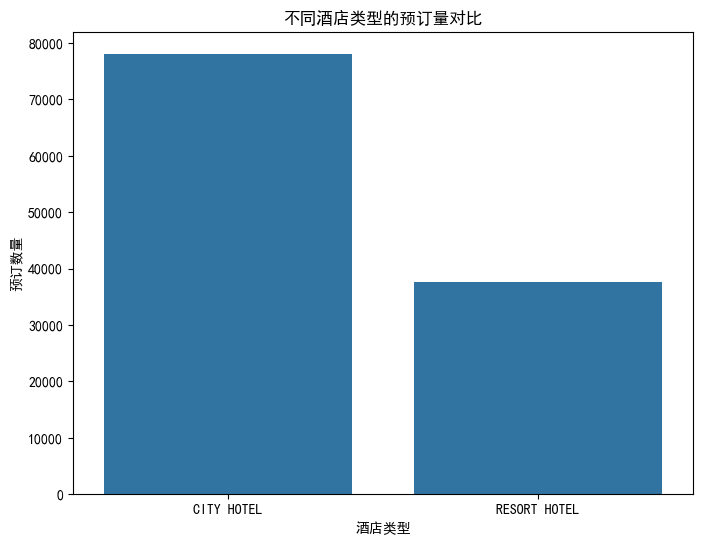

In [6]:
## 三、酒店类型对比分析
# 3.1 预订需求对比
hotel_distribution = df['hotel'].value_counts()
print("酒店类型预订量分布：")
print(hotel_distribution)

# 可视化
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_distribution.index, y=hotel_distribution.values)
plt.xlabel('酒店类型')
plt.ylabel('预订数量')
plt.title('不同酒店类型的预订量对比')
plt.show()

> **分析结论**：  
> 城市酒店预订量（78040条）显著高于假日酒店（37557条），是假日酒店的2.08倍，反映城市酒店市场需求更旺盛，可能与商务出行、城市旅游的高频需求相关。

整体预订取消率：36.99%

分酒店类型的取消率：
hotel
CITY HOTEL      0.417863
RESORT HOTEL    0.270123
Name: is_canceled, dtype: float64


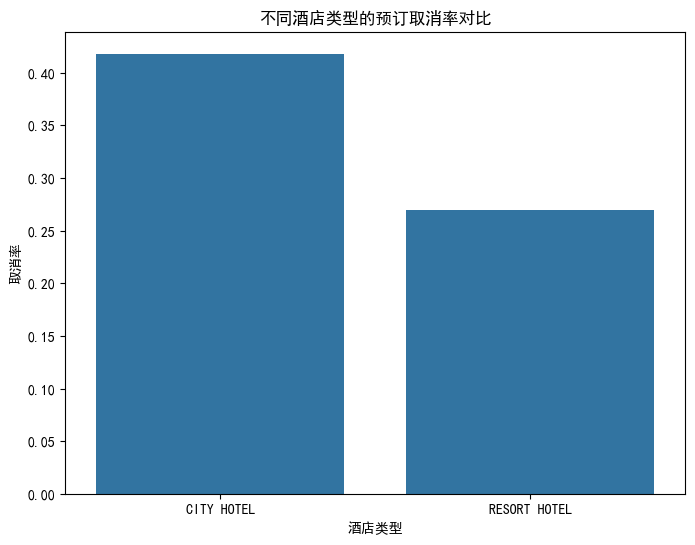

In [7]:
# 3.2 入住率对比（通过取消率间接分析）
# 整体取消率
cancellation_rate = df['is_canceled'].mean()
print(f"整体预订取消率：{cancellation_rate:.2%}")

# 分酒店类型的取消率
hotel_cancel_rate = df.groupby('hotel')['is_canceled'].mean()
print("\n分酒店类型的取消率：")
print(hotel_cancel_rate)

# 可视化
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_cancel_rate.index, y=hotel_cancel_rate.values)
plt.xlabel('酒店类型')
plt.ylabel('取消率')
plt.title('不同酒店类型的预订取消率对比')
plt.show()

> **分析结论**：  
> - 整体取消率为37.0%，其中城市酒店取消率（41.8%）显著高于假日酒店（27.0%）  
> - 按 “入住率 = 1 - 取消率” 计算：假日酒店入住率（73.0%）＞城市酒店（58.2%），说明假日酒店用户出行目的更明确（如度假），取消预订概率更低

提前预订时长统计描述：
count    115597.00
mean        105.02
std         107.70
min           0.00
25%          18.00
50%          70.00
75%         162.00
max         737.00
Name: lead_time, dtype: float64


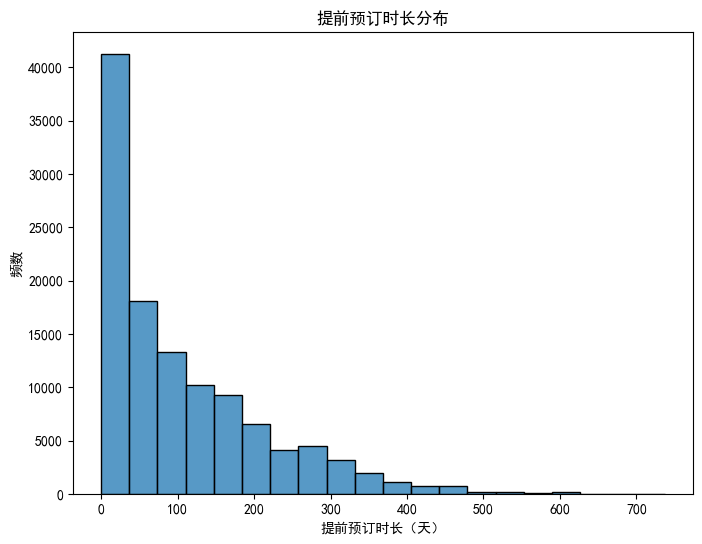

In [8]:
## 四、用户行为特征分析
# 4.1 提前预订时长分析
lead_time_stats = df['lead_time'].describe().round(2)
print("提前预订时长统计描述：")
print(lead_time_stats)

# 可视化
plt.figure(figsize=(8, 6))
sns.histplot(df['lead_time'], bins=20, kde=False)
plt.xlabel('提前预订时长（天）')
plt.ylabel('频数')
plt.title('提前预订时长分布')
plt.show()

> **分析结论**：  
> 用户预订时长均值105.02天，中位数70天，75%分位数162天，表明多数用户提前1-5个月规划行程。酒店需在这段周期内做好库存管理和预售策略。

入住时长统计描述：
count    115597.00
mean          3.40
std           2.55
min           0.00
25%           2.00
50%           3.00
75%           4.00
max          69.00
Name: stay_length, dtype: float64


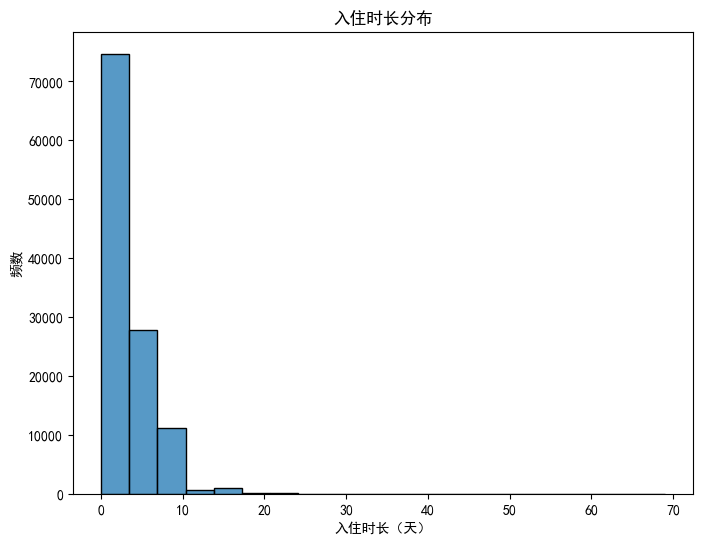

In [9]:
# 4.2 入住时长分析
# 计算总入住时长（周末+工作日）
df['stay_length'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
stay_stats = df['stay_length'].describe().round(2)
print("入住时长统计描述：")
print(stay_stats)

# 可视化
plt.figure(figsize=(8, 6))
sns.histplot(df['stay_length'], bins=20, kde=False)
plt.xlabel('入住时长（天）')
plt.ylabel('频数')
plt.title('入住时长分布')
plt.show()

> **分析结论**：  
> 平均入住时长3.40天，中位数3天，75%分位数4天，说明短期住宿（1-4天）是主流需求。酒店可优化短期套餐（如"3天2晚特惠"）提升用户吸引力。

餐食类型预订分布：
meal
BB           89936
HB           13189
SC           10649
Undefined     1105
FB             718
Name: count, dtype: int64


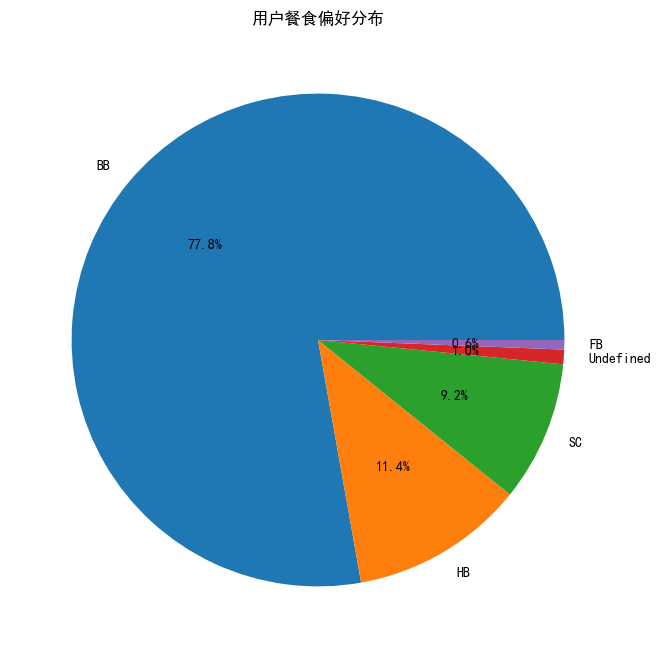

In [10]:
# 4.3 餐食偏好分析
meal_preference = df['meal'].value_counts()
print("餐食类型预订分布：")
print(meal_preference)

# 可视化
plt.figure(figsize=(8, 8))
plt.pie(meal_preference.values, labels=meal_preference.index, autopct='%1.1f%%')
plt.title('用户餐食偏好分布')
plt.show()

> **分析结论**：  
> - "BB（仅早餐）"占比77.8%，是绝对主流选择  
> - 其次为"HB（半食宿）"（11.4%）和"SC（无餐食）"（9.2%）  
> 建议：聚焦早餐质量提升，适当精简其他餐食服务以降低运营成本

不同季节的平均每日房价：
season
冬季     73.93
夏季    118.31
春季     95.51
秋季     89.72
Name: adr, dtype: float64


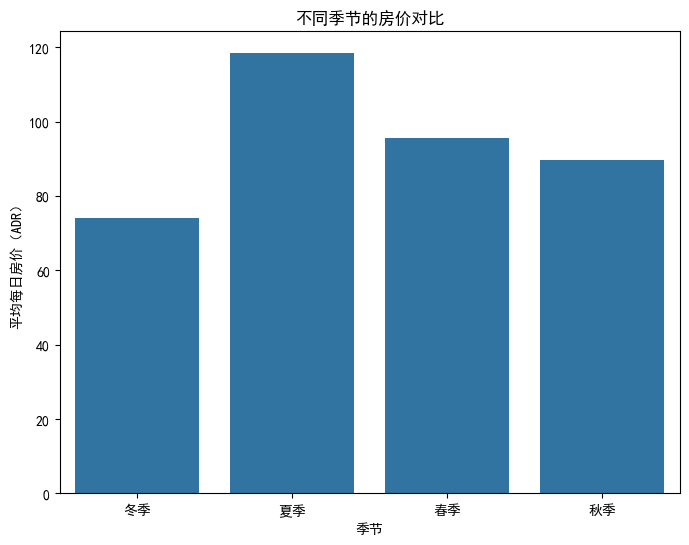

In [11]:
## 五、最佳预订时间分析
# 5.1 季节划分与房价分析
# 英文月份转数字映射
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12
}

# 定义季节判断函数
def get_season(month):
    month_num = month_map[month]
    if 3 <= month_num <= 5:
        return '春季'
    elif 6 <= month_num <= 8:
        return '夏季'
    elif 9 <= month_num <= 11:
        return '秋季'
    else:
        return '冬季'

# 新增季节列并计算平均房价
df['season'] = df['arrival_date_month'].apply(get_season)
season_adr = df.groupby('season')['adr'].mean().round(2)
print("不同季节的平均每日房价：")
print(season_adr)

# 可视化
plt.figure(figsize=(8, 6))
sns.barplot(x=season_adr.index, y=season_adr.values)
plt.xlabel('季节')
plt.ylabel('平均每日房价（ADR）')
plt.title('不同季节的房价对比')
plt.show()

> **分析结论**：  
> 夏季（6-8月）平均房价最高（118.31），冬季（12-2月）最低（73.93），价格差异达44.38。从性价比角度，冬季是最佳预订时间；若需平衡价格与旅游体验，秋季（89.72）是折中选

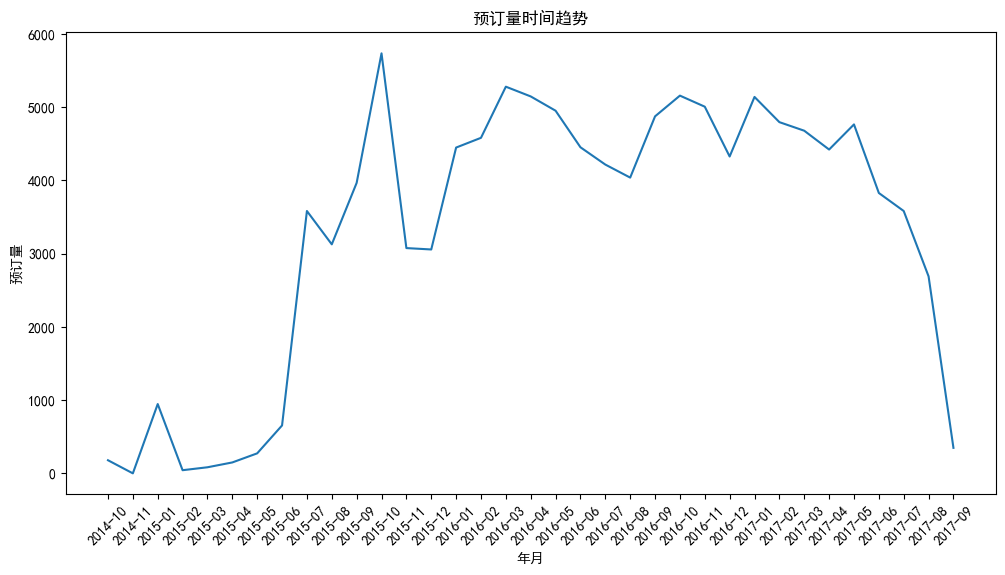

In [12]:
# 5.2 预订量时间趋势
# 提取年月信息
df['reservation_year_month'] = df['reservation_status_date'].dt.strftime('%Y-%m')
booking_trend = df['reservation_year_month'].value_counts().sort_index()

# 可视化
plt.figure(figsize=(12, 6))
sns.lineplot(x=booking_trend.index, y=booking_trend.values)
plt.xlabel('年月')
plt.ylabel('预订量')
plt.title('预订量时间趋势')
plt.xticks(rotation=45)
plt.show()

> **分析结论**：  
> 预订量呈现季节性波动，每年10月、3-5月为高峰期，可能与节假日（如五一、国庆）相关。酒店需在旺季提前增加库存，避免满房流失客户。

相关性矩阵：
                           lead_time  stay_length   adr  is_canceled  \
lead_time                       1.00         0.16 -0.04         0.30   
stay_length                     0.16         1.00  0.05         0.01   
adr                            -0.04         0.05  1.00         0.06   
is_canceled                     0.30         0.01  0.06         1.00   
total_of_special_requests      -0.10         0.08  0.18        -0.23   

                           total_of_special_requests  
lead_time                                      -0.10  
stay_length                                     0.08  
adr                                             0.18  
is_canceled                                    -0.23  
total_of_special_requests                       1.00  


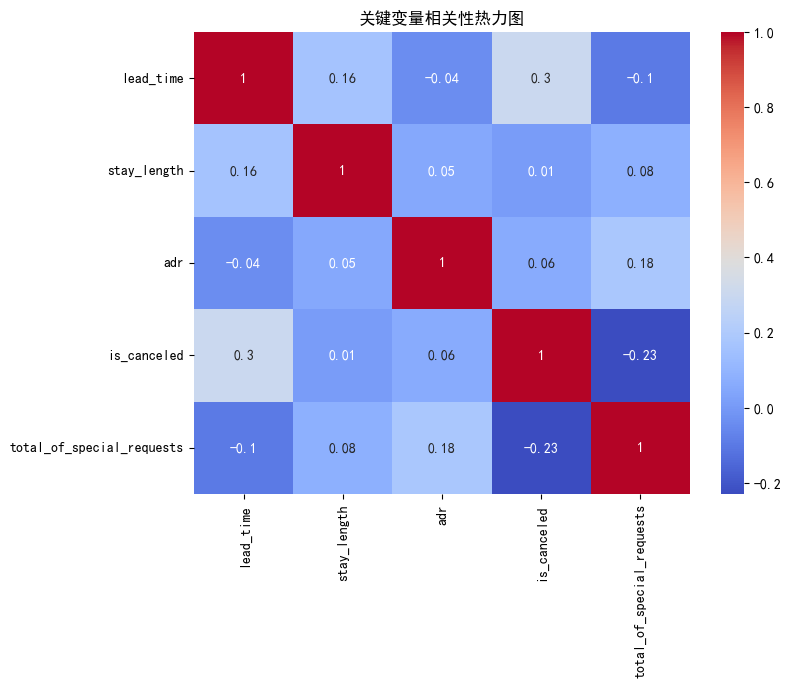

In [13]:
## 六、变量相关性分析
# 选择关键变量进行相关性分析
corr_cols = ['lead_time', 'stay_length', 'adr', 'is_canceled', 'total_of_special_requests']
corr_matrix = df[corr_cols].corr().round(2)
print("相关性矩阵：")
print(corr_matrix)

# 可视化热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('关键变量相关性热力图')
plt.show()

> **分析结论**：  
> 1. `lead_time`与`is_canceled`（0.30）：弱正相关，提前预订越久，取消概率越高（可能因行程变动）  
> 2. `total_of_special_requests`与`is_canceled`（-0.23）：弱负相关，特殊需求越多的用户，取消概率越低（需求明确）  
> 3. 其他变量间相关性较弱（绝对值＜0.1），说明影响相对独立